![ashpokemonbattles](images/ashpokemonbattles.jpg)

# Data-Driven Merchandise Sales Strategy: Exploring Pokemon Choices

## Scenario: Business Task and Objectives

I am a junior data analyst working for a business intelligence consultant. I have been assigned a project for a new client, a retail store specializing in anime and game merchandise. My task is to conduct a data-driven analysis to provide recommendations for curating a compelling lineup of Pokemon merchandise to kickstart the retail store's offerings. The objective is to optimize the selection of Pokemon plushies that will resonate with customers, align with their preferences, and maximize sales potential.

To achieve this, my analysis will consider various factors, including:

1. Analyzing Ash's Journey and Pokemon Win Rates: By examining Ash's journey in the Pokemon animated series and games, I will identify the Pokemon that have been consistently used by Ash and have achieved high win rates in battles. These Pokemon hold significant popularity and can serve as strong candidates for inclusion in the merchandise lineup.
2. Investigating Reddit Survey Data: I will explore data from a Reddit survey that captures the favorite Pokemon of Reddit users. This survey provides valuable insights into the preferences and beloved Pokemon among online communities. Analyzing the survey results will help identify Pokemon that garner significant attention and are highly regarded by fans.
3. Examining Japan Survey Data for Pokemon Scarlet/Violet: Additionally, I will investigate data from a Japan survey specifically focused on the favorite Pokemon of players in the Pokemon Scarlet/Violet games. This survey provides insights into the preferences and favorite Pokemon of the Japanese market, which is a significant audience for Pokemon merchandise. Incorporating these findings will help ensure that the pokemon lineup appeals to the Japanese customer base.
4. Creating a Ranking of Popularity: A key aspect of this project is to create a comprehensive ranking of Pokemon popularity, this will be derived from the analysis of the datasets obtained from the previous section. By incorporating this fourth objective, we ensure a holistic approach to our analysis, encompassing various factors and capturing the evolving preferences and popularity of Pokemon within different contexts.

## Data Sources
The analysis will involve the following datasets:

- Ash's Pokemon Win Percentages: Kanto-Alola (2020)
  - This dataset records pokemon captured and used by Ash Ketchup in battles, including both official and unofficial battles, up to gen 7.
  - Source: [Ash Pokemon rank by win percentage](https://www.deviantart.com/pkmnmasterwheeler/art/Ash-s-Pokemon-Win-Percentages-Kanto-Alola-864961647)
  -------------------------------------------------------------

- Complete Pokemon dataset (2022)
  - This comprehensive dataset contains information on pokemon up to generation 9 and was compiled from [pokemondb.net](https://pokemondb.net/pokedex/all).
  - Source: [Kaggle dataset](https://www.kaggle.com/datasets/brdata/complete-pokemon-dataset-gen-iiv?resource=download)
  -------------------------------------------------------------

- Reddit's Favourite Pokemon Survey (2019)
  - This dataset originates from a Reddit survey and includes the favorite pokemon of 52,836 users.
  - Source: [Reddit's Favourite Pokemon Survey](https://www.reddit.com/r/pokemon/comments/c0w4s0/favourite_pok%C3%A9mon_survey_results/)
  -------------------------------------------------------------

- Japan's Favorite Pokemon Survey (2022)
  - This dataset comprises the results of a survey conducted in Japan, highlighting the favorite pokemon among 177,829 respondents.
  - Source: [Favorite Pokémon in 2022](https://gamewith.jp/pokemon-sv/article/show/381211)

In the 'ash_pokemon_kanto-alola.csv' file, the following information is available:
- **name:** The name of each pokemon.
- **battles:** the total number of battles for each pokemon.
- **wins:** The number of battles won by each pokemon.
- **losses:** The number of battles lost by each pokemon.

From the 'Pokedex_Cleaned.csv' file, I will import the following information:
* **type:** The pokemon type for each entry.

From the 'reddit_survey_data.csv' file:
* **Pokemon:** The name of each pokemon.
* **Number of votes:** The number of votes received by each pokemon in the survey.

Lastly, from the 'japan_survey_data.csv' file:
* **name:** The name of each pokemon.
* **votes:** The number of votes received by each pokemon in the survey.

## Data Preparation and Transformation

In this section, several actions were performed to prepare and transform the data for further analysis and recommendation generation. These actions included:

1. Cleaning and Standardization: I focused on ensuring data integrity and accuracy by checking missing values, handling duplicate entries, and resolving inconsistencies within the dataset.
2. Feature Engineering: I derived new features from the Ash Pokemon dataset, including win percentage and a variety of ranks based off different datasets.
3. Data Integration: Incorporated the pokemon type data from the pokedex dataset into each respective dataset, to enhance the visualization capabilities.
4. Color Palette Setup: I established a color palette based on Pokemon types. This palette will be utilized in the visualization created in a later section, enhancing the visual representation of Pokemon attributes.
5. Rank-Based Dataset Creation and Recommendation List: I created a comprehensive dataset that incorporates rankings based on the number of battles, win percentage, Reddit survey votes, and Japan survey votes for each Pokemon. Using this rank-based dataset, I generated a recommendation list that highlights the top-performing Pokemon across various categories. This approach ensures that our recommendations are based on objective criteria and provide valuable insights.

In [1]:
# Importing libraries
library(tidyverse)

# Loading Ash pokemon data
data_raw <- read.csv("data/ash_pokemon_kanto-alola.csv")
head(data_raw)

# Loading Pokedex data
pokedex_data <- read.csv("data/Pokedex_Cleaned.csv", skip = 1, header = FALSE, stringsAsFactors = FALSE)

# Exclude the first column
pokedex_data <- pokedex_data[, -1]
# Remove the additional columns
pokedex_data <- pokedex_data[, 1:2]

# Rename columns
colnames(pokedex_data) <- c("name", "type_1")

# Print the modified dataset
head(pokedex_data)

# Loading Reddit Survey data
reddit_survey_data <- read.csv("data/reddit_survey_data.csv", skip = 1, header = TRUE)

# Rename columns and drop the ones I don't need
colnames(reddit_survey_data) <- c("name", "votes")
reddit_survey_data <- subset(reddit_survey_data, select = c("name", "votes"))
head(reddit_survey_data)

# Loading Japan Survey data
japan_survey_data <- read.csv("data/japan_survey_data.csv")
head(japan_survey_data);

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,name,battles,wins,losses
,<chr>,<int>,<int>,<int>
1,Pikachu,538,479,59
2,Goodra,16,14,2
3,Naganadel,7,6,1
4,Greninja,55,47,8
5,Bayleef,38,32,6
6,Incineroar,24,20,4


,name,type_1
,<chr>,<chr>
1,Bulbasaur,Grass
2,Ivysaur,Grass
3,Venusaur,Grass
4,Venusaur,Grass
5,Charmander,Fire
6,Charmeleon,Fire


,name,votes
,<chr>,<int>
1,Charizard,1107
2,Gengar,1056
3,Arcanine,923
4,Bulbasaur,710
5,Blaziken,613
6,Umbreon,607


,name,votes
,<chr>,<int>
1,Tinkaton,7458
2,Clodsire,5820
3,Meowscarada,5311
4,Fuecoco,4464
5,Ceruledge,3922
6,Tastugiri Curly Form,3059


In [2]:
# Removing duplicate data
pokedex_data <- pokedex_data[!duplicated(pokedex_data$name), ]

# Merging data
merged_pokemon <- left_join(data_raw, pokedex_data, by= "name") %>%
	select(name, battles, wins, losses, type_1)

# Data preview
head(merged_pokemon)

,name,battles,wins,losses,type_1
,<chr>,<int>,<int>,<int>,<chr>
1,Pikachu,538,479,59,Electric
2,Goodra,16,14,2,Dragon
3,Naganadel,7,6,1,Poison
4,Greninja,55,47,8,Water
5,Bayleef,38,32,6,Grass
6,Incineroar,24,20,4,Fire


In [3]:
# Adding another column
ash_pokemon <- merged_pokemon %>% mutate(win_pct = wins / battles)

# Renaming column type_1 to type
ash_pokemon <- ash_pokemon %>% rename(type = type_1)
head(ash_pokemon)

,name,battles,wins,losses,type,win_pct
,<chr>,<int>,<int>,<int>,<chr>,<dbl>
1,Pikachu,538,479,59,Electric,0.8903346
2,Goodra,16,14,2,Dragon,0.8750000
3,Naganadel,7,6,1,Poison,0.8571429
4,Greninja,55,47,8,Water,0.8545455
5,Bayleef,38,32,6,Grass,0.8421053
6,Incineroar,24,20,4,Fire,0.8333333


In [4]:
# Check for missing values in each column for all Pokemon
pokemon_with_missing <- apply(ash_pokemon, 1, function(row) any(is.na(row)))

# Subset the dataset to show Pokemon with missing values
pokemon_missing_values <- ash_pokemon[pokemon_with_missing, ]
print(pokemon_missing_values)

[1] name    battles wins    losses  type    win_pct
<0 rows> (or 0-length row.names)


In [5]:
# Setting up color palette based on pokemon types
type_colors <- c("Bug" = "#A8B820", "Dark" = "#705848", "Dragon" = "#7038F8", 
                 "Electric" = "#F8D030", "Fairy" = "#EE99AC", "Fighting" = "#C03028", 
                 "Fire" = "#F08030", "Flying" = "#A890F0", "Ghost" = "#705898", 
                 "Grass" = "#78C850", "Ground" = "#E0C068", "Ice" = "#98D8D8", 
                 "Normal" = "#A8A878", "Poison" = "#A040A0", "Psychic" = "#F85888", 
                 "Rock" = "#B8A038", "Steel" = "#B8B8D0", "Water" = "#6890F0")

In [6]:
# Create a new dataset with ranks for battles and win percentage
new_dataset <- data.frame(
  name = ash_pokemon$name,
  battle_rank = rank(-ash_pokemon$battles, na.last = "keep"),
  win_pct_rank = rank(-ash_pokemon$win_pct, na.last = "keep")
)
# Creating rank for the reddit survey data 
reddit_survey_data$votes_rank <- rank(-reddit_survey_data$votes, na.last = "keep")

# Merging the new dataset with the reddit survey results
new_dataset <- merge(new_dataset, reddit_survey_data[, c("name", "votes_rank")], by = "name", all = TRUE)

# Creating rank for the japan survey data
japan_survey_data$japan_votes_rank <- rank(-japan_survey_data$votes, na.last = "keep")

# Merging the new dataset with the japan survey results
new_dataset <- merge(new_dataset, japan_survey_data[, c("name", "japan_votes_rank")], by = "name", all = TRUE)

# Print the new dataset with rank
head(new_dataset)

,name,battle_rank,win_pct_rank,votes_rank,japan_votes_rank
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Abomasnow,NA,NA,393.0,NA
2,Abra,NA,NA,120.5,NA
3,Absol,NA,NA,11.0,NA
4,Accelgor,NA,NA,494.5,NA
5,Aegislash,NA,NA,78.0,NA
6,Aerodactyl,NA,NA,233.0,NA


In [7]:
# Calculate the ranking scores for battles
battle_score <- ifelse(is.na(new_dataset$battle_rank), 0,
                       ifelse(new_dataset$battle_rank <= 5, 50,
                              ifelse(new_dataset$battle_rank <= 10, 40,
                                     ifelse(new_dataset$battle_rank <= 20, 30,
                                            ifelse(new_dataset$battle_rank <= 50, 20,
                                                   ifelse(new_dataset$battle_rank <= 100, 10, 5))))))

# Calculate the ranking scores for win percentage
win_pct_score <- ifelse(is.na(new_dataset$win_pct_rank), 0,
                         ifelse(new_dataset$win_pct_rank <= 5, 50,
                                ifelse(new_dataset$win_pct_rank <= 10, 40,
                                       ifelse(new_dataset$win_pct_rank <= 20, 30,
                                              ifelse(new_dataset$win_pct_rank <= 30, 20,
                                                     ifelse(new_dataset$win_pct_rank <= 100, 10, 5))))))

# Calculate the ranking scores for Reddit survey
reddit_score <- ifelse(is.na(new_dataset$votes_rank), 0,
                        ifelse(new_dataset$votes_rank <= 5, 50,
                               ifelse(new_dataset$votes_rank <= 10, 40,
                                      ifelse(new_dataset$votes_rank <= 20, 30,
                                             ifelse(new_dataset$votes_rank <= 50, 20,
                                                    ifelse(new_dataset$votes_rank <= 100, 10, 5))))))

# Calculate the ranking scores for Japan survey
japan_score <- ifelse(is.na(new_dataset$japan_votes_rank), 0,
                       ifelse(new_dataset$japan_votes_rank == 1, 70,
                              ifelse(new_dataset$japan_votes_rank <= 3, 65,
                                     ifelse(new_dataset$japan_votes_rank <= 5, 60,
                                            ifelse(new_dataset$japan_votes_rank <= 10, 50,
                                                   ifelse(new_dataset$japan_votes_rank <= 20, 55,
                                                          ifelse(new_dataset$japan_votes_rank <= 30, 52,
                                                                 ifelse(new_dataset$japan_votes_rank <= 50, 51,
                                                                        ifelse(new_dataset$japan_votes_rank <= 100, 1, 0)))))))))

# Calculate the aggregated score
aggregated_score <- battle_score + win_pct_score + reddit_score + japan_score

# Combine Pokémon data with aggregated score
pokemon_scores <- data.frame(name = new_dataset$name, score = aggregated_score)

# Sort the Pokémon based on the aggregated score
sorted_pokemon <- pokemon_scores[order(pokemon_scores$score, decreasing = TRUE), ]

# Select the top-ranked Pokémon as recommendations
top_recommendations <- head(sorted_pokemon, 25) # <-- Modify this number to modify the recommendations table

In [8]:
# Initialize an empty data frame to store the details
pokemon_details <- data.frame()

# Iterate over each Pokemon in the top_recommendations list
for (pokemon in top_recommendations$name) {
  # Get the details for the current Pokemon
  pokemon_details <- rbind(pokemon_details, new_dataset[new_dataset$name == pokemon, ])}

# Create a new data frame with the desired columns
pokemon_table <- data.frame(
	Rank = 1:nrow(pokemon_details),
  pokemon_name = pokemon_details$name,
  battle_rank = ifelse(!is.na(pokemon_details$battle_rank), paste0("#", pokemon_details$battle_rank), "-"),
  win_pct_rank = ifelse(!is.na(pokemon_details$win_pct_rank), paste0("#", pokemon_details$win_pct_rank), "-"),
  reddit_survey = ifelse(!is.na(pokemon_details$votes_rank), paste0("#", pokemon_details$votes_rank), "-"),
  japan_survey = ifelse(!is.na(pokemon_details$japan_votes_rank), 
                                     paste0("#", pokemon_details$japan_votes_rank), 
                                     "-"),
  stringsAsFactors = FALSE)

## Supporting Visualizations and Key Findings

In this section, the objective is to delve into the data and gain insights into the top-performing Pokemon across different categories and datasets.

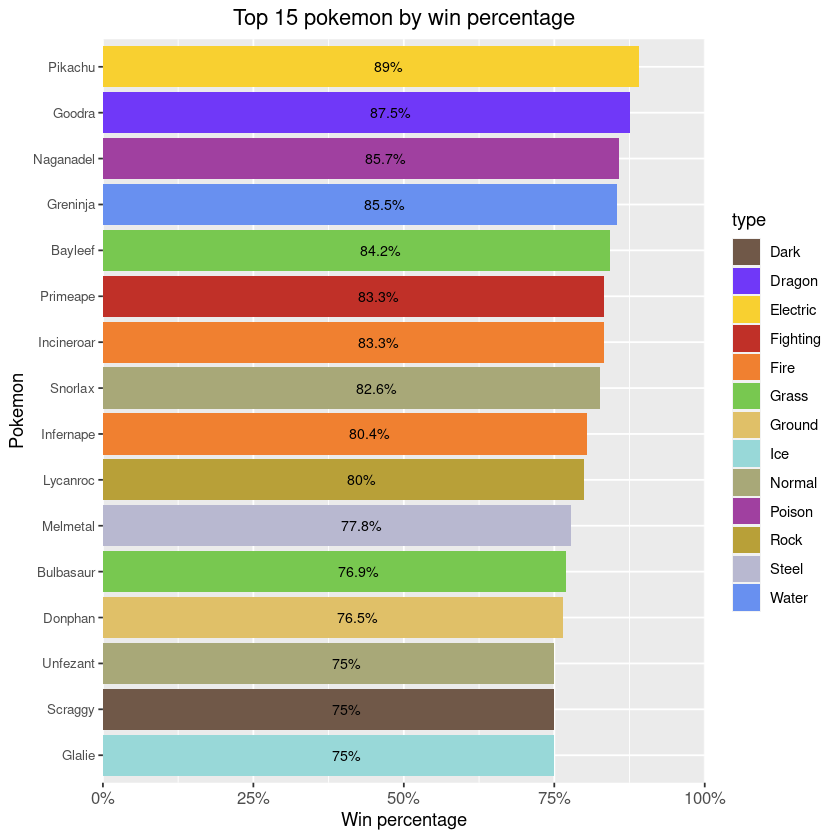

In [9]:
# Plotting Top 15 Ash pokemon by win percentage

# Preparing the data
top_win_pct <- ash_pokemon %>%
  select(name, battles, wins, win_pct, type) %>%
  arrange(desc(win_pct)) %>%
  top_n(15, win_pct)

# Plotting the data
ggplot(top_win_pct, aes(x=win_pct, y=reorder(name, win_pct), fill=type)) +
  geom_bar(stat= 'identity') +
  geom_text(aes(label=paste0(round(win_pct*100,1), "%")), hjust = -0.1, size = 3, position = position_stack(vjust = 0.5)) +
  scale_x_continuous(limits = c(0, 1), expand = c(0, 0), labels = scales::percent_format(accuracy = 1)) +
  xlab('Win percentage') +
  ylab('Pokemon') +
  ggtitle('Top 15 pokemon by win percentage') +
  scale_fill_manual(values = type_colors) +
  theme(axis.text.x = element_text(size = 10), axis.text.y = element_text(size = 8), plot.title = element_text(hjust = 0.5))

In [10]:
# Top 15 Ash Pokemon by number of battles
top_battles_count <- ash_pokemon %>%
	select(name, battles) %>%
	arrange(desc(battles)) %>%
	top_n(5, battles)
top_battles_count

name,battles
<chr>,<int>
Pikachu,538
Greninja,55
Bulbasaur,52
Sceptile,48
Charizard,47
Corphish,47


After inspecting the top Pokemon by number of battles, it becomes evident that Pikachu stands out significantly, surpassing all other Pokemon in terms of battle count. To provide a more meaningful visualization, a scatter plot comparing the number of battles with the win percentage was used. Additionally, to better capture the comparative scale of battle numbers, a log scale was applied for the number of battles.

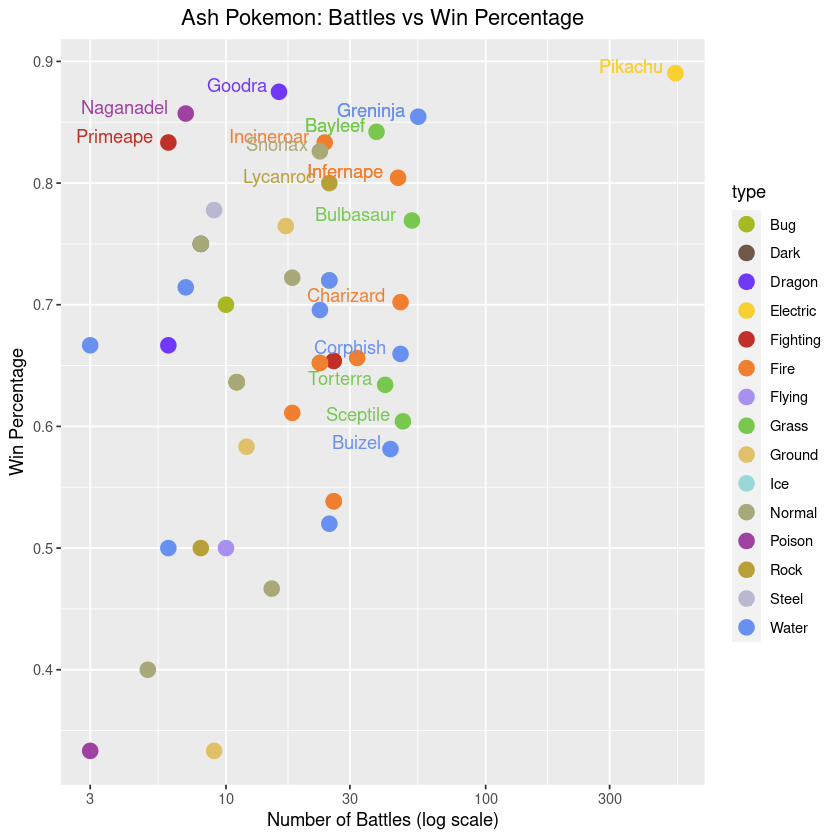

In [11]:
# Plotting Top number of battles vs Win Percentage

# Sorting the data by win percentage and battles
top_win_pct <- head(ash_pokemon[order(ash_pokemon$win_pct, decreasing = TRUE), ], 10)
top_battles <- head(ash_pokemon[order(ash_pokemon$battles, decreasing = TRUE), ], 10)

# Plotting the scatter plot with logarithmic scale on the x-axis and text labels
ggplot(ash_pokemon, aes(x = battles, y = win_pct, color = type)) +
  geom_point(size = 4) +
  scale_color_manual(values = type_colors) +
  scale_x_log10() +
  xlab('Number of Battles (log scale)') +
  ylab('Win Percentage') +
  ggtitle('Ash Pokemon: Battles vs Win Percentage') +
  geom_text(data = top_win_pct, aes(label = name), hjust = 1.2, vjust = 0) +
  geom_text(data = top_battles, aes(label = name), hjust = 1.2, vjust = 0) +
theme(plot.title = element_text(hjust = 0.5))

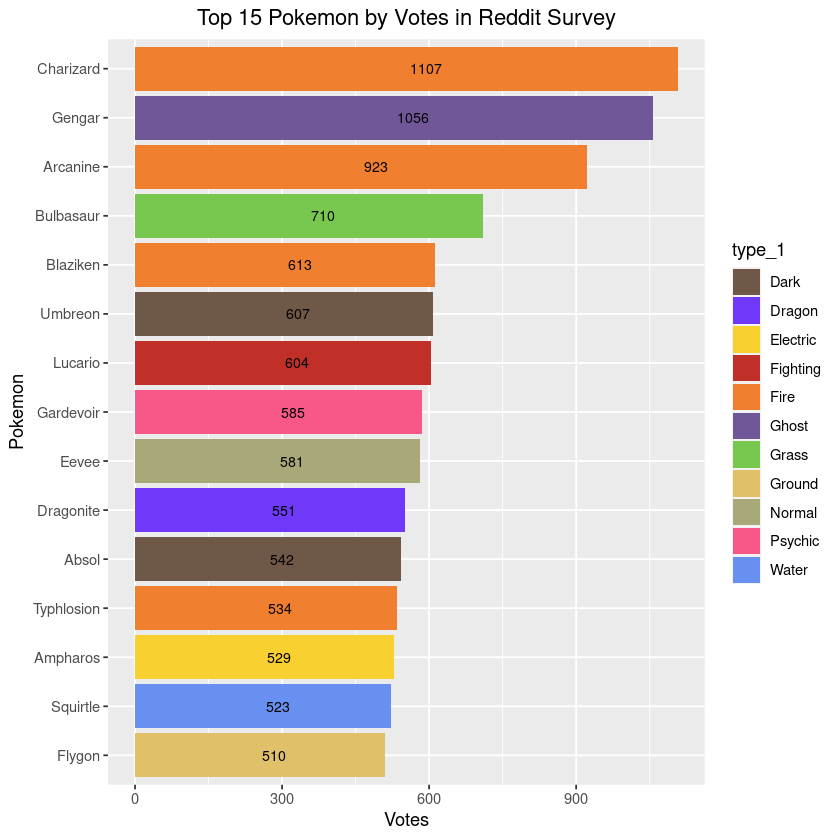

In [12]:
# Plotting the top 15 most voted pokemon in the Reddit Survey

# Merge the reddit_survey_data with pokedex_data to get type information
merged_data <- merge(reddit_survey_data, pokedex_data[, c("name", "type_1")], by = "name", all.x = TRUE)

# Filter the merged data to include only the top 15 Pokémon
top_15 <- head(merged_data[order(merged_data$votes, decreasing = TRUE), ], 15)

# Plot the top 15 Pokémon with colors based on their types
ggplot(top_15, aes(x = reorder(name, votes), y = votes, fill = type_1)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = votes), hjust = -0.1, size = 3, position = position_stack(vjust = 0.5)) +
  coord_flip() +
  labs(x = "Pokemon", y = "Votes", title = "Top 15 Pokemon by Votes in Reddit Survey") +
  scale_fill_manual(values = type_colors) +
  theme(plot.title = element_text(hjust = 0.5))

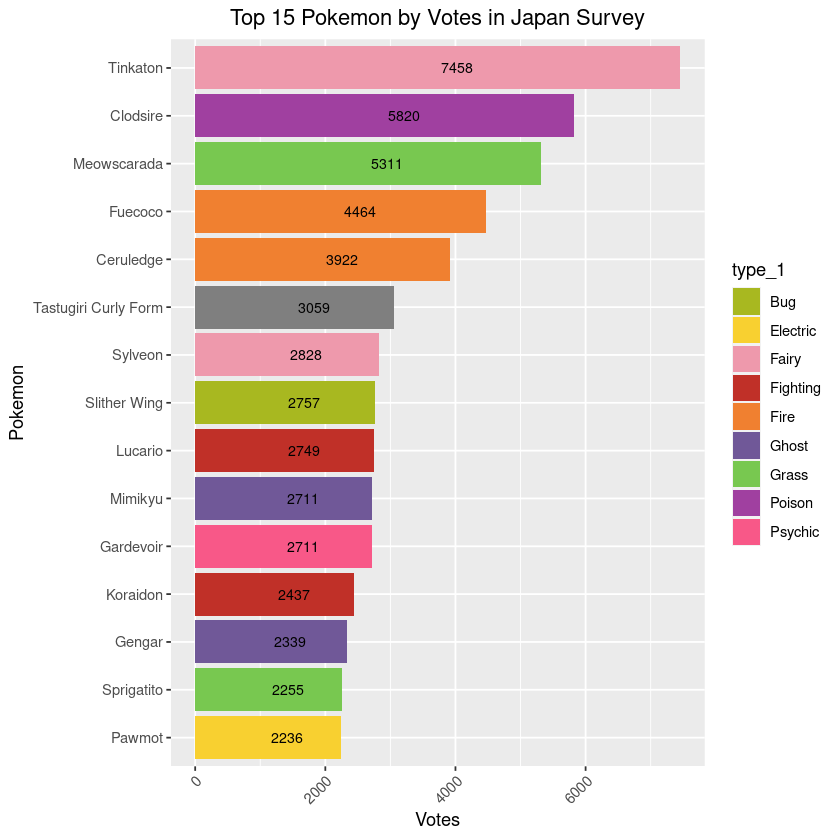

In [13]:
# Plotting the top 15 most voted pokemon in the Japan Survey

# Merge the reddit_survey_data with pokedex_data to get type information
merged_data <- merge(japan_survey_data, pokedex_data[, c("name", "type_1")], by = "name", all.x = TRUE)

# Filter the merged data to include only the top 15 Pokémon
top_15 <- head(merged_data[order(merged_data$votes, decreasing = TRUE), ], 15)

# Plot the top 15 Pokémon with colors based on their types
ggplot(top_15, aes(x = reorder(name, votes), y = votes, fill = type_1)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = votes), hjust = -0.1, size = 3, position = position_stack(vjust = 0.5)) +
  coord_flip() +
  labs(x = "Pokemon", y = "Votes", title = "Top 15 Pokemon by Votes in Japan Survey") +
  scale_fill_manual(values = type_colors) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), plot.title = element_text(hjust = 0.5))

## Major Insights and Actionable Conclusions

1. Data-driven Recommendation List: By implementing a balanced scoring system, I have created a data-driven recommendation list for the starting merchandise lineup. This approach ensures that any decisions are not based on personal biases or arbitrary choices. Instead, we can rely on comprehensive data analysis to identify the most suitable Pokemon based on their performance, popularity, and fan preferences. This data-driven approach adds credibility and increases the likelihood of selecting Pokemon that resonate with potential customers.
2. Enduring Popularity of Gen 1 Pokemon: One interesting observation is the presence of several Pokemon from Generation 1 in our recommendation list, even in the most recent data source, the Japan survey. This highlights the continued favoritism and enduring popularity of these iconic Pokemon among fans. Considering the sustained appeal of Gen 1 Pokemon, it would be prudent to include them prominently in the merchandise lineup to cater to the nostalgia and emotional connection that fans have with these beloved characters.
3. Maximizing Revenue Potential: By leveraging the insights from our analysis, we can strategically maximize the revenue potential of the starting merchandise lineup. By selecting Pokemon that not only have high rankings but also possess a combination of competitive strength, fan popularity, and cultural significance, we can create a lineup that appeals to a wide range of fans. This approach taps into various market segments, catering to both hardcore competitive players and casual fans seeking nostalgic experiences.
4. Continuous Data Monitoring: To stay up-to-date with evolving fan preferences and trends, it is crucial to establish a system for continuous data monitoring. Regularly updating our dataset with new survey results, social media sentiment analysis, and sales data will enable us to adapt our merchandise lineup accordingly. This iterative approach ensures that our selections remain relevant and aligned with the ever-changing dynamics of the Pokemon fandom.

Incorporating these major insights and actionable conclusions will guide us in making informed decisions and developing a merchandise lineup that combines data-driven recommendations, enduring fan favorites, and revenue-maximizing strategies.

In [14]:
# Final recommendation table
pokemon_table

Rank,pokemon_name,battle_rank,win_pct_rank,reddit_survey,japan_survey
<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Pikachu,#1,#1,#44,#31
2,Charizard,#5.5,#21,#1,#25
3,Bulbasaur,#3,#12,#4,-
4,Greninja,#2,#4,#66,-
5,Infernape,#7,#9,#18,-
6,Gengar,-,-,#2,#13
7,Arcanine,-,-,#3,#36
8,Bayleef,#10,#5,#196.5,-
9,Gardevoir,-,-,#8,#10.5


## Enhancing the Analysis: Additional Recommendations for Consideration
In addition to the key findings and insights obtained from the analysis, there are several avenues for further exploration and enhancement of the project.

Ideas for Further Analysis and Enhancement:

- Utilize Pokemon Types and Generations: Explore the potential of utilizing the Pokemon types and generations data to create more rankings for the Reddit survey. By incorporating these variables into the scoring system, we can enhance the analysis and provide more nuanced recommendations based on generational popularity and type preferences, also creating ranks based on the most voted Pokemon for each type, allowing us to provide specialized recommendations tailored to fans' specific type affinities.
- Leverage Weight and Height Data: By utilizing this information, we can explore product opportunities that align with the physical characteristics of different Pokemon. For instance, by focusing on Pokemon with larger sizes, such as those with significant weight or towering heights, we can propose products like oversized plushies, larger posters, or collectible figurines. Incorporating weight and height data allows us to cater to the preferences of fans who appreciate Pokemon with impressive physical proportions, providing them with merchandise that accurately represents their favorite characters in a visually appealing way.
- Developing a Well-Balanced Scoring System: To determine the final rankings, it is recommended to develop a scoring system that considers various factors, from data already present but also anything else that can be added later. Finding the right balance of factors will ensure a fair and comprehensive evaluation of each Pokemon. This scoring system will serve as a valuable tool for ranking and selecting the Pokemon for the expanding the merchandise lineup.
- Obtain Updated Data for Ash Ketchum's Teams: To further strengthen our analysis and provide a comprehensive evaluation of Pokemon suitability, it is recommended to acquire an updated dataset that includes information on the Pokemon that have been part of Ash Ketchum's teams beyond Generation 7. By incorporating data from the more recent Pokemon series, we can capture the evolving dynamics of Ash's team composition and factor in the popularity and performance of these Pokemon in our recommendation list.


The following recommendations offer valuable opportunities to expand our understanding and refine the selection process for Pokemon merchandise.

- Customer Surveys and Feedback Analysis: Gather customer feedback through surveys or focus groups to understand their preferences, expectations, and desired features in Pokemon merchandise. Analyze the collected data to uncover additional insights and fine-tune the selection.
- Exploring Trainer Profiles: By delving deeper into the world of Pokemon animated series and games, we can uncover valuable insights by investigating the popularity of trainers. Analyzing the pokemon teams of more trainers allows us to draw inspiration and gather further suggestions for our Pokemon merchandise lineup.
- Incorporate Trainer-Themed Collections: Expanding from the previous point, we could consider creating trainer-themed collections based on popular trainers. For instance, we could group together Pokemon plushies that are associated with a specific trainer or offer sets that recreate their team compositions. This approach allows fans to collect and display plushies that represent their favorite trainers, further enhancing the emotional connection and appeal of the merchandise.